In [1]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [2]:
df_train = joblib.load(r'..\assets\combined\train_impute.pkl')
df_test = joblib.load(r'..\assets\combined\test_impute.pkl')

In [3]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643279 entries, 0 to 2643278
Data columns (total 140 columns):
 #    Column                                             Non-Null Count    Dtype  
---   ------                                             --------------    -----  
 0    user_id                                            2643279 non-null  object 
 1    app_id                                             2643279 non-null  int64  
 2    relevance_score                                    2643279 non-null  float64
 3    user_country_code                                  2643279 non-null  object 
 4    user_has_coordinates                               2643279 non-null  bool   
 5    user_latitude                                      2643279 non-null  float64
 6    user_longitude                                     2643279 non-null  float64
 7    user_account_age_months                            2643279 non-null  float64
 8    game_name                                         

In [4]:
# Considering this project will not update the game database periodically, the temporary data is not useful
temp_cols = ['game_avg_playtime_last_2weeks', 'game_median_last_2weeks']
df_train.drop(columns=temp_cols, inplace=True)
df_test.drop(columns=temp_cols, inplace=True)

In [5]:
# Convert to boolean dtype
numerical_cols = df_train.select_dtypes(include='number').columns.tolist()
should_be_bool = [col for col in numerical_cols if set(df_train[col].unique()) == {0,1}]
df_train[should_be_bool] = df_train[should_be_bool].astype('bool')
df_test[should_be_bool] = df_test[should_be_bool].astype('bool')

In [6]:
# Convert release year to release since min(year)
min_year = df_train['game_released_year'].min()
df_train[f'game_released_year_since_{min_year}'] = df_train['game_released_year'] - min_year
df_test[f'game_released_year_since_{min_year}'] = df_test['game_released_year'] - min_year

df_train.drop(columns=['game_released_year'], inplace=True)
df_test.drop(columns=['game_released_year'], inplace=True)

In [7]:
numerical_cols = df_train.select_dtypes(include='number').columns.tolist()

In [8]:
# Exclude these numerical columns
for col in ['app_id', 'relevance_score']:
    numerical_cols.remove(col)

In [9]:
with pd.option_context("display.max_rows", None, 'display.float_format', '{:.2f}'.format):
    display(df_train[numerical_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
user_latitude,2643279.00,39.87,19.20,-62.19,37.09,42.61,51.17,71.71
user_longitude,2643279.00,1.31,64.21,-178.14,-11.78,9.49,20.48,178.07
user_account_age_months,2643279.00,184.20,37.67,50.97,156.65,178.29,209.21,258.28
game_RAWG_weighted_avg_rating,2643279.00,2.52,1.48,0.00,1.78,3.00,3.67,4.83
game_RAWG_ratings_count,2643279.00,304.15,652.90,0.00,7.00,45.00,256.00,6816.00
game_RAWG_reviews_with_text_count,2643279.00,1.88,5.21,0.00,0.00,0.00,1.00,83.00
game_RAWG_bookmark_count,2643279.00,2107.85,3069.44,0.00,212.00,813.00,2564.00,21513.00
game_metacritic_rating,2643279.00,76.50,6.69,23.00,77.00,77.00,77.00,97.00
game_RAWG_system_suggest_count,2643279.00,381.86,184.44,0.00,238.00,375.00,521.00,1725.00
game_RAWG_reviews_count,2643279.00,307.09,659.67,0.00,8.00,45.00,259.00,6928.00


<Axes: ylabel='Frequency'>

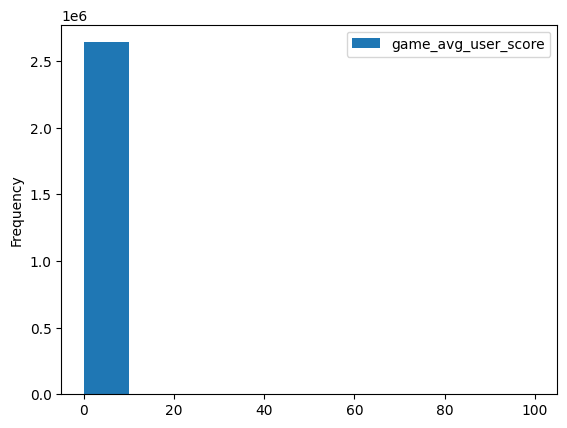

In [10]:
df_train[['game_avg_user_score']].plot(kind='hist')

<Axes: ylabel='Frequency'>

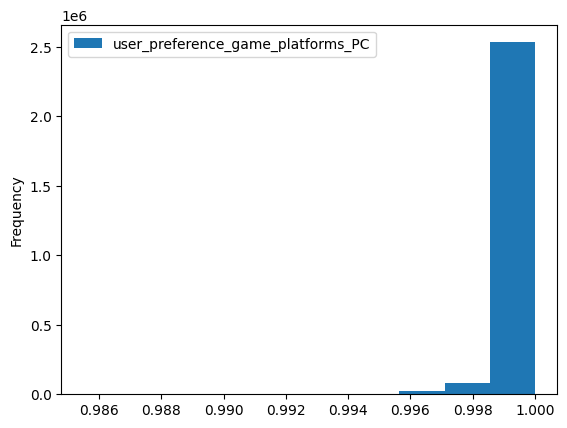

In [11]:
df_train[['user_preference_game_platforms_PC']].plot(kind='hist')

In [12]:
# Too skew, don't provide useful information
df_train.drop(columns=['game_avg_user_score', 'user_preference_game_platforms_PC'], inplace=True)
df_test.drop(columns=['game_avg_user_score', 'user_preference_game_platforms_PC'], inplace=True)
numerical_cols.remove('game_avg_user_score')
numerical_cols.remove('user_preference_game_platforms_PC')

## PowerTransform

In [13]:
# Calculate the skewness to identify which should be PowerTransform

def skewness_table(df, numerical_cols):
    """Return and display a skewness table in descending order"""

    skew_table = df[numerical_cols].skew().sort_values(ascending=False).to_frame(name='Skewness')
    skew_table['Skewness (abs)'] = skew_table['Skewness'].abs()
    skew_table = skew_table.sort_values('Skewness (abs)', ascending=False)

    with pd.option_context("display.max_rows", None):
        display(skew_table)

    return skew_table

skew_table = skewness_table(df_train, numerical_cols)

,Skewness,Skewness (abs)
game_median_playtime_forever,150.684114,150.684114
game_avg_playtime_forever,29.738786,29.738786
game_concurrent_user,19.491719,19.491719
game_positive_review_count,18.580481,18.580481
game_estimate_owners_upper,17.700100,17.700100
game_popularity,16.958308,16.958308
game_negative_review_count,16.569229,16.569229
game_estimate_owners_lower,15.424932,15.424932
user_preference_game_platforms_Neo Geo,8.198056,8.198056
game_RAWG_bookmark_type_toplay_count,7.487432,7.487432


In [14]:
# zero-variance columns in both train and test set have no information, so decide to drop
zero_var_cols_train = [col for col in numerical_cols if df_train[col].nunique() <= 1]
zero_var_cols_test = [col for col in numerical_cols if df_test[col].nunique() <= 1]

print(zero_var_cols_train, '\n', zero_var_cols_test)

['game_esrb_rating_Unknown', 'game_genres_Unknown', 'user_preference_game_esrb_rating_Unknown', 'user_preference_game_genres_Unknown', 'user_preference_game_platforms_Unknown'] 
 ['game_esrb_rating_Unknown', 'game_genres_Unknown', 'user_preference_game_esrb_rating_Unknown', 'user_preference_game_genres_Unknown', 'user_preference_game_platforms_Unknown']


In [15]:
df_train.drop(columns=zero_var_cols_train, inplace=True)
df_test.drop(columns=zero_var_cols_test, inplace=True)

for col in zero_var_cols_train:
    numerical_cols.remove(col)

In [16]:
# Apply PowerTransformer on columns where absolute skewness is greater than 1
cols_to_transform = skew_table[skew_table['Skewness (abs)'] > 1].index

pt = PowerTransformer(method='yeo-johnson', standardize=False)

df_train[cols_to_transform] = pt.fit_transform(df_train[cols_to_transform])

In [17]:
# Re-evaluate the skewness
_ = skewness_table(df_train, cols_to_transform)

,Skewness,Skewness (abs)
user_latitude,-0.877100,0.877100
user_preference_game_platforms_3DO,0.744459,0.744459
game_RAWG_reviews_with_text_count,0.736452,0.736452
user_preference_game_platforms_Neo Geo,0.638455,0.638455
user_preference_game_popularity,0.467887,0.467887
game_initial_price,-0.429150,0.429150
game_current_price,-0.396530,0.396530
user_preference_game_esrb_rating_Rating Pending,0.365697,0.365697
user_preference_game_duration,0.357483,0.357483
game_metacritic_rating,0.289870,0.289870


In [18]:
# Apply same PowerTransformer to test set
df_test[cols_to_transform] = pt.transform(df_test[cols_to_transform])
_ = skewness_table(df_test, cols_to_transform)

,Skewness,Skewness (abs)
game_RAWG_reviews_with_text_count,0.819067,0.819067
user_preference_game_platforms_Neo Geo,0.723416,0.723416
user_latitude,-0.715636,0.715636
user_preference_game_platforms_3DO,0.647008,0.647008
user_preference_game_popularity,0.536274,0.536274
user_preference_game_genres_Massively Multiplayer,0.502510,0.502510
user_preference_game_esrb_rating_Rating Pending,0.455138,0.455138
user_preference_game_genres_Simulation,-0.432081,0.432081
game_initial_price,-0.431283,0.431283
game_current_price,-0.400953,0.400953


## Standardization

In [19]:
scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [ ]:
numerical_cols = df_train.select_dtypes(include='number').columns.tolist()  # Include all numerical cols, in case anything is missed

# Note that app_id is just the game identifier and won't pass to the model
# relevance_score is [0, 1] min max scaled, done in previous work
with pd.option_context("display.max_rows", None, 'display.float_format', '{:.2f}'.format):
    display(df_train[numerical_cols].agg(['mean', 'std']).T)

,mean,std
app_id,474897.80,426331.74
relevance_score,0.28,0.35
user_latitude,-0.00,1.00
user_longitude,0.00,1.00
user_account_age_months,0.00,1.00
game_RAWG_weighted_avg_rating,-0.00,1.00
game_RAWG_ratings_count,-0.00,1.00
game_RAWG_reviews_with_text_count,0.00,1.00
game_RAWG_bookmark_count,-0.00,1.00
game_metacritic_rating,-0.00,1.00


In [21]:
with pd.option_context("display.max_rows", None, 'display.float_format', '{:.2f}'.format):
    display(df_test[numerical_cols].agg(['mean', 'std']).T)

,mean,std
app_id,476756.13,425419.84
relevance_score,0.25,0.34
user_latitude,-0.08,1.09
user_longitude,0.22,1.13
user_account_age_months,0.02,0.99
game_RAWG_weighted_avg_rating,-0.07,1.03
game_RAWG_ratings_count,-0.06,1.02
game_RAWG_reviews_with_text_count,-0.04,0.99
game_RAWG_bookmark_count,-0.07,1.03
game_metacritic_rating,-0.00,0.98


In [22]:
joblib.dump(df_train, r'..\assets\combined\train_scaled.pkl')
joblib.dump(df_test, r'..\assets\combined\test_scaled.pkl')

['..\\assets\\combined\\test_scaled.pkl']